In [75]:
%matplotlib inline

In [76]:
from __future__ import division

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [78]:
filename ='1__featureCombinationResults4Features_crossEntropy2.csv'

df=pd.read_csv(filename)
print "\nFound %i data points" % len(df.index)


Found 26505 data points


In [79]:
df.head(3)

,TRAININGALGORITHM,DATASET,TRAININGRUN,FEATURES,NUMNEURONSHIDDLAYER,THRESHOLD,AUC,FAR,TPR,FNR,TNR
0,trainrp,testSet,1,1 2,10,1,0.57955,0.000000,0.000,1.000,1.00000
1,trainrp,testSet,1,1 2,10,2,0.57955,0.000000,0.125,0.875,1.00000
2,trainrp,testSet,1,1 2,10,3,0.57955,0.045455,0.125,0.875,0.95455


# Let's plot a few ROC curves just to see how they look. 

[0, 1, 0, 1]

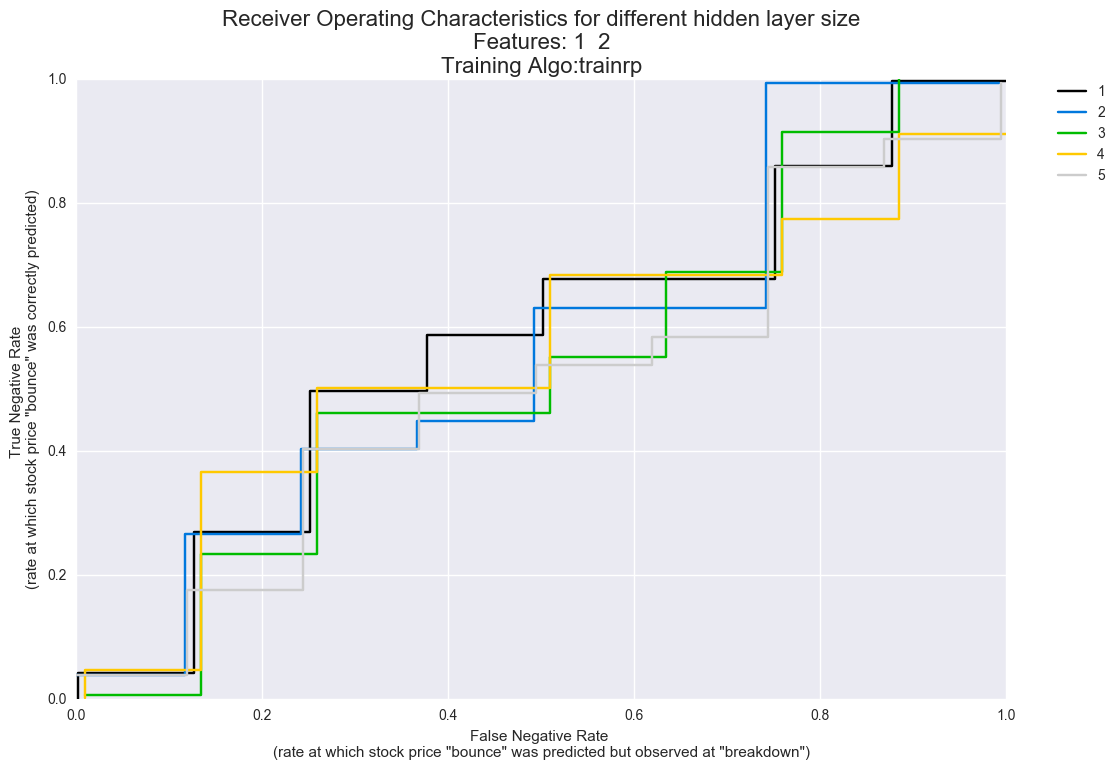

In [80]:
f, ax1 = plt.subplots(figsize=(12, 8))

runsList = df.TRAININGRUN.unique()
color=iter(plt.cm.spectral(np.linspace(0,1,len(runsList))))

features = '1  2'
trainingAlgo = 'trainrp'
selTrngAlgo = df[(df.TRAININGALGORITHM==trainingAlgo)]
selFeatures = selTrngAlgo[(selTrngAlgo.FEATURES==features)]

for runNumber in runsList:
    c=next(color)
    df_sorted=selFeatures[selFeatures.TRAININGRUN==runNumber].sort_values(by ='THRESHOLD')

    #this line plots after adding jitter
    plt.plot(df_sorted.FNR+np.random.uniform(-0.01,0.01,1),df_sorted.TNR+np.random.uniform(-0.01,0.01,1),c=c)
    #this one is with no jitter
    #plt.plot(df_sorted.FAR,df_sorted.TPR,c=c)

plt.legend(runsList,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Receiver Operating Characteristics for different training runs\nFeatures: '+
          str(features)+'\nTraining Algo:'+trainingAlgo,  fontsize=16)
plt.ylabel('True Negative Rate \n(rate at which stock price "bounce" was correctly predicted)')
plt.xlabel('False Negative Rate \n(rate at which stock price "bounce" was predicted but observed at "breakdown")')
plt.axis([0,1, 0,1])

#### Interesting. The only variable that changed during the 5 runs was the initial weights and biases of the NN. As expected, the performance varies with different initial weights and biases. 

# Let's quickly show why we are plottingTNR vs. FNR, and how they should be interpreted

We are interested in the features that yield the lowest median FNR. Here's why:

We want to use the median because the performance varies just with a different set of initial weights and biases. 

Now, why the LOWEST FNR?

If it predicts a breakdown (a "positive" prediction), we sell the stock. If it turned out to be a false positive, it's OK. 

If it predicts a bounce (a "negative" prediction), we keep the stock. If it was a false negative, then we suffer and cry. 

Therefore, we are not too interested in how often we get the breakdowns predictions right or wrong, but rather, how ofen we get the "bounces" right and wrong. That's why we are plotting TNR vs. FNR. 

The lowest possible FNR is 0, and we want it to be zero because we cannot accept false negatives. That is, we cannot affort to be wrong on a "bounce" prediction. 

#### Let's use the last two features and see how the plot looks like. 

[0, 1, 0, 1]

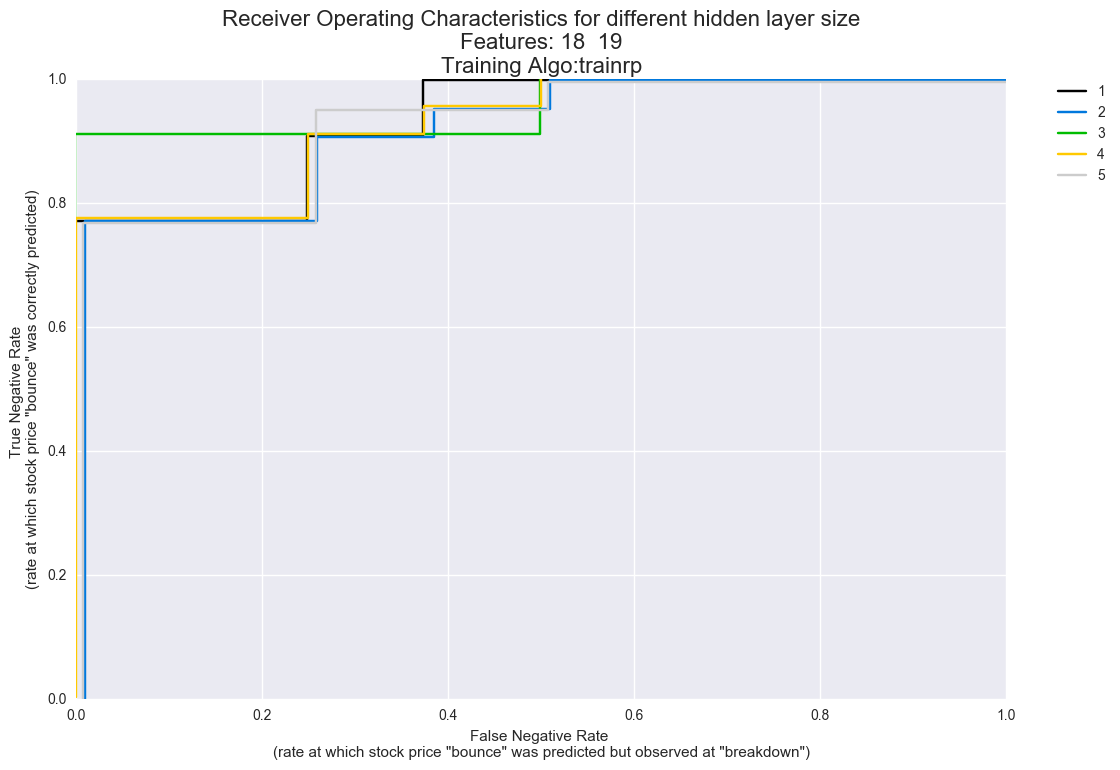

In [81]:
f, ax1 = plt.subplots(figsize=(12, 8))

runsList = df.TRAININGRUN.unique()
color=iter(plt.cm.spectral(np.linspace(0,1,len(runsList))))

features = '18  19'
trainingAlgo = 'trainrp'
selTrngAlgo = df[(df.TRAININGALGORITHM==trainingAlgo)]
selFeatures = selTrngAlgo[(selTrngAlgo.FEATURES==features)]

for runNumber in runsList:
    c=next(color)
    df_sorted=selFeatures[selFeatures.TRAININGRUN==runNumber].sort_values(by ='THRESHOLD')

    #this line plots after adding jitter
    plt.plot(df_sorted.FNR+np.random.uniform(-0.01,0.01,1),df_sorted.TNR+np.random.uniform(-0.01,0.01,1),c=c)
    #this one is with no jitter
    #plt.plot(df_sorted.FAR,df_sorted.TPR,c=c)

plt.legend(runsList,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Receiver Operating Characteristics for different training runs\nFeatures: '+
          str(features)+'\nTraining Algo:'+trainingAlgo,  fontsize=16)
plt.ylabel('True Negative Rate \n(rate at which stock price "bounce" was correctly predicted)')
plt.xlabel('False Negative Rate \n(rate at which stock price "bounce" was predicted but observed at "breakdown")')
plt.axis([0,1, 0,1])

#### Let's plot median TNR vs. median FNR for all the feature combinations. Note that there is a high number of feature combination pairs, so plotting all the data may be difficult. Let's try it and see what we get:

In [86]:
thresholdList = df.THRESHOLD.unique()
runsList = df.TRAININGRUN.unique()
featComboList = df.FEATURES.unique()
color=iter(plt.cm.spectral(np.linspace(0,1,len(featComboList))))

trainingAlgo = 'trainrp'


#for every threshold and feature combination, compute the median FNR using all runs
featL = []
thresL = []
FNR = []
TNR = []
for featCombo in featComboList:    
    for threshold in thresholdList:
        
        featL.append(featCombo)
        thresL.append(threshold)
        FNR.append(np.median(df[(df.THRESHOLD==threshold) & (df.FEATURES==featCombo)].FNR))
        TNR.append(np.median(df[(df.THRESHOLD==threshold) & (df.FEATURES==featCombo)].TNR))
        
df2 = pd.DataFrame()
df2['TNR'] = TNR
df2['FNR'] = FNR
df2['THRESHOLD'] = thresL
df2['FEATURES'] = featL

There are 171 feature combinations


[0, 1, 0, 1]

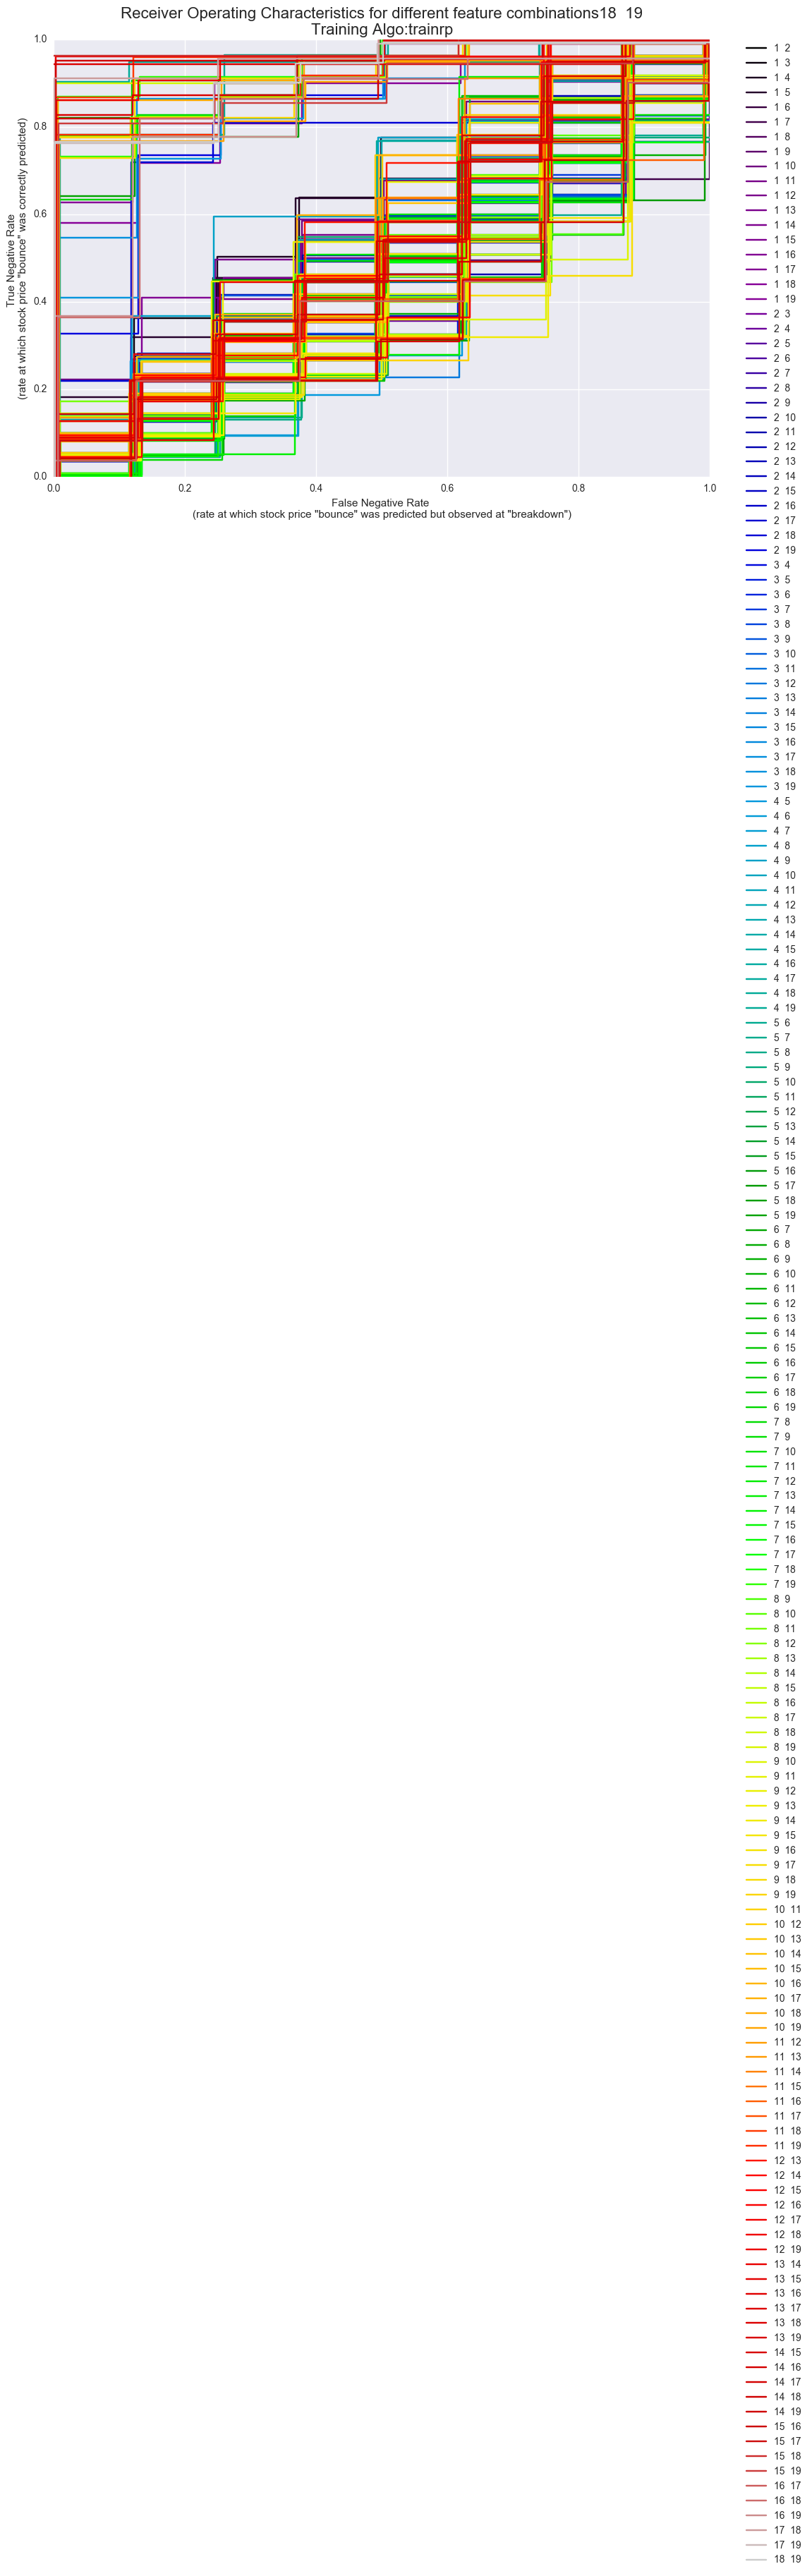

In [85]:
f, ax1 = plt.subplots(figsize=(12, 8))

thresholdList = df2.THRESHOLD.unique()
featComboList = df2.FEATURES.unique()
color=iter(plt.cm.spectral(np.linspace(0,1,len(featComboList))))

print("There are " + str(len(featComboList)) + " feature combinations")

for featCombo in featComboList:
    c=next(color)
        
    df_sorted=df2[(df2.FEATURES==featCombo)].sort_values(by ='THRESHOLD')
    plt.plot(df_sorted.FNR+np.random.uniform(-0.01,0.01,1),df_sorted.TNR+np.random.uniform(-0.01,0.01,1),c=c)
    


plt.legend(featComboList,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Receiver Operating Characteristics for different feature combinations'+
          str(features)+'\nTraining Algo:'+trainingAlgo,  fontsize=16)
plt.ylabel('True Negative Rate \n(rate at which stock price "bounce" was correctly predicted)')
plt.xlabel('False Negative Rate \n(rate at which stock price "bounce" was predicted but observed at "breakdown")')
plt.axis([0,1, 0,1])


#### As expected, this plot shows too much data. Since we already know we cannot tolerate FNR > 0 for any TNR>0,  let's use that as a filter. That is, for each feature combo, let's get the max TNR when FNR>0.8 (0.8 was chosen because there exist data points given this threshold, but it could have been lower or higher). 

[-0.0001, 0.0001, 0.79, 1]

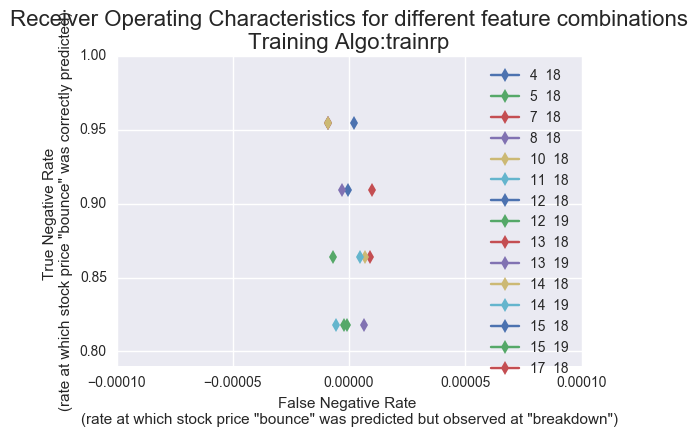

In [150]:
for featCombo in featComboList:
    maxTNR = np.max(df2[(df2.FEATURES==featCombo) & (df2.FNR==0) & (df2.TNR>0.8)].TNR)
    if not np.isnan(maxTNR):
        plt.plot(np.random.uniform(-0.00001,0.00001,1),maxTNR,marker="d",label=featCombo)
    
plt.legend()
plt.title('Receiver Operating Characteristics for different feature combinations'+ '\nTraining Algo:'+trainingAlgo,  fontsize=16)
plt.ylabel('True Negative Rate \n(rate at which stock price "bounce" was correctly predicted)')
plt.xlabel('False Negative Rate \n(rate at which stock price "bounce" was predicted but observed at "breakdown")')
plt.axis([-0.0001,0.0001, 0.79,1])

#### We can start to see a pattern (ote that some jitter was added to the x-axis). There are a few features that score highly consistenly. The following list shows the frequency of the features appearing given our filters:

| feature # | frequency |
| ----------|:---------:| 
|     4     |      1    | 
|     5     |      1    |
|     7     |      1    |
|     8     |      1    |
|     10    |      1    |
|     11    |      1    |
|     12    |      2    |
|     13    |      2    |
|     14    |      2    |
|     15    |      2    |
|     16    |      2    |
|     17    |      1    |
|     18    |      11   |
|     19    |      4    |


#### One can see that feature 18 is a good one. This feature is the volume rate of change. Let's see which feature combination scores the highest TNR for an FNR=0:

In [153]:
allMaxTNRs = []
featComboMax = []
for featCombo in featComboList:
    maxTNR = np.max(df2[(df2.FEATURES==featCombo) & (df2.FNR==0) & (df2.TNR>0.8)].TNR)
    if not np.isnan(maxTNR):
        allMaxTNRs.append(maxTNR)
        featComboMax.append(featCombo)
        
print("Max TNR found is: "+str(np.max(allMaxTNRs)))
print("Feature combination is: "+str(featComboMax[np.argmax(allMaxTNRs)]))

Max TNR found is: 0.95455
Feature combination is: 12  18


#### Feature 18, we said, is the volume rate of change (dV/dt). 
#### Feature 12 is the price relative to the 1-standard deviation upper Bollinger Band ($/BBU1sig)